1) [Discover & clean data:) ](#t1.)

2) [Prepare data  <:](#t2.)

  ##### ....We tested 3 moduls:
3) [1. HistGradientBoostingRegressor ](#t3.)

4) [2. BaggingRegressor ](#t4.)

5) [3. DecisionTreeRegressor ](#t5.)

In [59]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [60]:
df_train = pd.read_csv('C:\\Users\\Abdelrahman\\projects\\Kaggle Projects\\Hous_prices\\Data\\train.csv')

df_test = pd.read_csv('C:\\Users\\Abdelrahman\\projects\\Kaggle Projects\\Hous_prices\\Data\\test.csv')

df_train.shape

(1460, 81)

<a id="t1."></a>
# Discover & clean data :)

In [61]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
df_train.duplicated().sum()

0

In [63]:
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [64]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [65]:
#cheak false values in salesprice 

indexNames = df_train[ df_train['SalePrice']<0  ].index
indexNames

Index([], dtype='int64')

### transform data  to nums using LabelEncoder

##### tranform (train data)

In [66]:
import pandas as pd

data =df_train
string_columns = data.select_dtypes(include='object').columns

print(string_columns)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [67]:
# LabelEncder function

import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_features(data, categorical_features):
    # Create a LabelEncoder instance
    encoder = LabelEncoder()

    # Transform each categorical feature
    for feature in categorical_features:
        # Encode the feature values
        encoded_values = encoder.fit_transform(data[feature])

        # Replace the original feature values with the encoded values
        data[feature] = encoded_values

    return data


In [68]:

# Identify the categorical features
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

# Encode the categorical features
encoded_data = label_encode_features(df_train, categorical_features)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [69]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
KitchenAbvGr,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


### remove( LotFrontage ,GarageYrBlt ,MasVnrArea)


In [70]:
#dealing with missing data
df_train = df_train.drop(missing_data[missing_data['Total'] > 1].index, axis=1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index, axis=0)
df_train.isnull().sum().max()
   #just checking that there's no missing data missing...

0

In [71]:
df_train.shape

(1460, 78)

## Split 

In [72]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,3,60,3,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,4,70,3,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,5,60,3,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4


In [73]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Tranform (test data)

In [74]:
import pandas as pd

data =df_test
string_columns = data.select_dtypes(include='object').columns

print(string_columns)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [75]:
# Load the data
df_test = df_test

# Identify the categorical features
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

# Encode the categorical features
encoded_data = label_encode_features(df_test, categorical_features)

<a id="t2."></a>
# Prepare data <:

### Deal with null/NAN values for feature selection

### treat wiht NAN value  to use  feature selection 
#####   does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
#### we have three algo 
*.*  BaggingRegressor

*.* DecisionTreeRegressor

*.* HistGradientBoostingRegressor

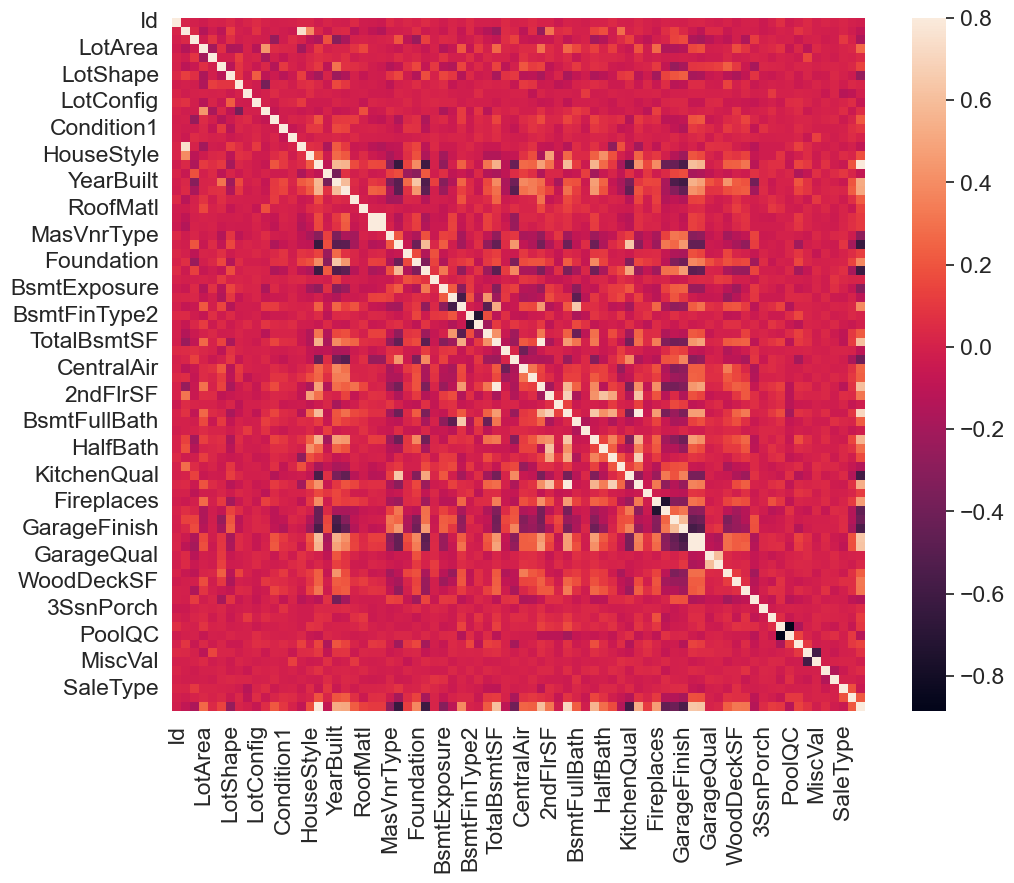

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if df_train is not None or empty
if df_train is not None and len(df_train) > 0:
    # Create the correlation matrix
    corrmat = df_train.corr()

    # Create the heatmap
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, vmax=.8, square=True)
    plt.show()
else:
    print('df_train is either None or empty. Please load or create data before calculating the correlation matrix.')
    
#++NOTE++ the id colum have to be exist to make the corr graph

##### Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next. i will select some feature and see

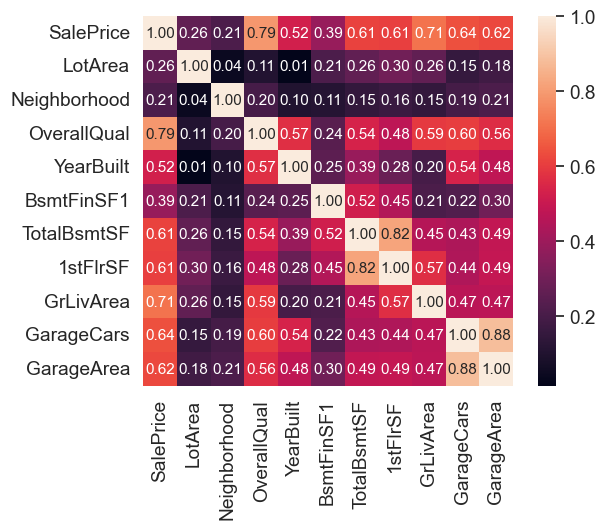

In [77]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Select the variables you want to include in the correlation matrix
cols = ['SalePrice','LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 
        'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF','GrLivArea','GarageCars','GarageArea']

# Calculate the correlation matrix
cm = np.corrcoef(df_train[cols].values.T)

# Create a heatmap of the correlation matrix
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols, xticklabels=cols)
plt.show()


C:\Users\Abdelrahman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Abdelrahman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


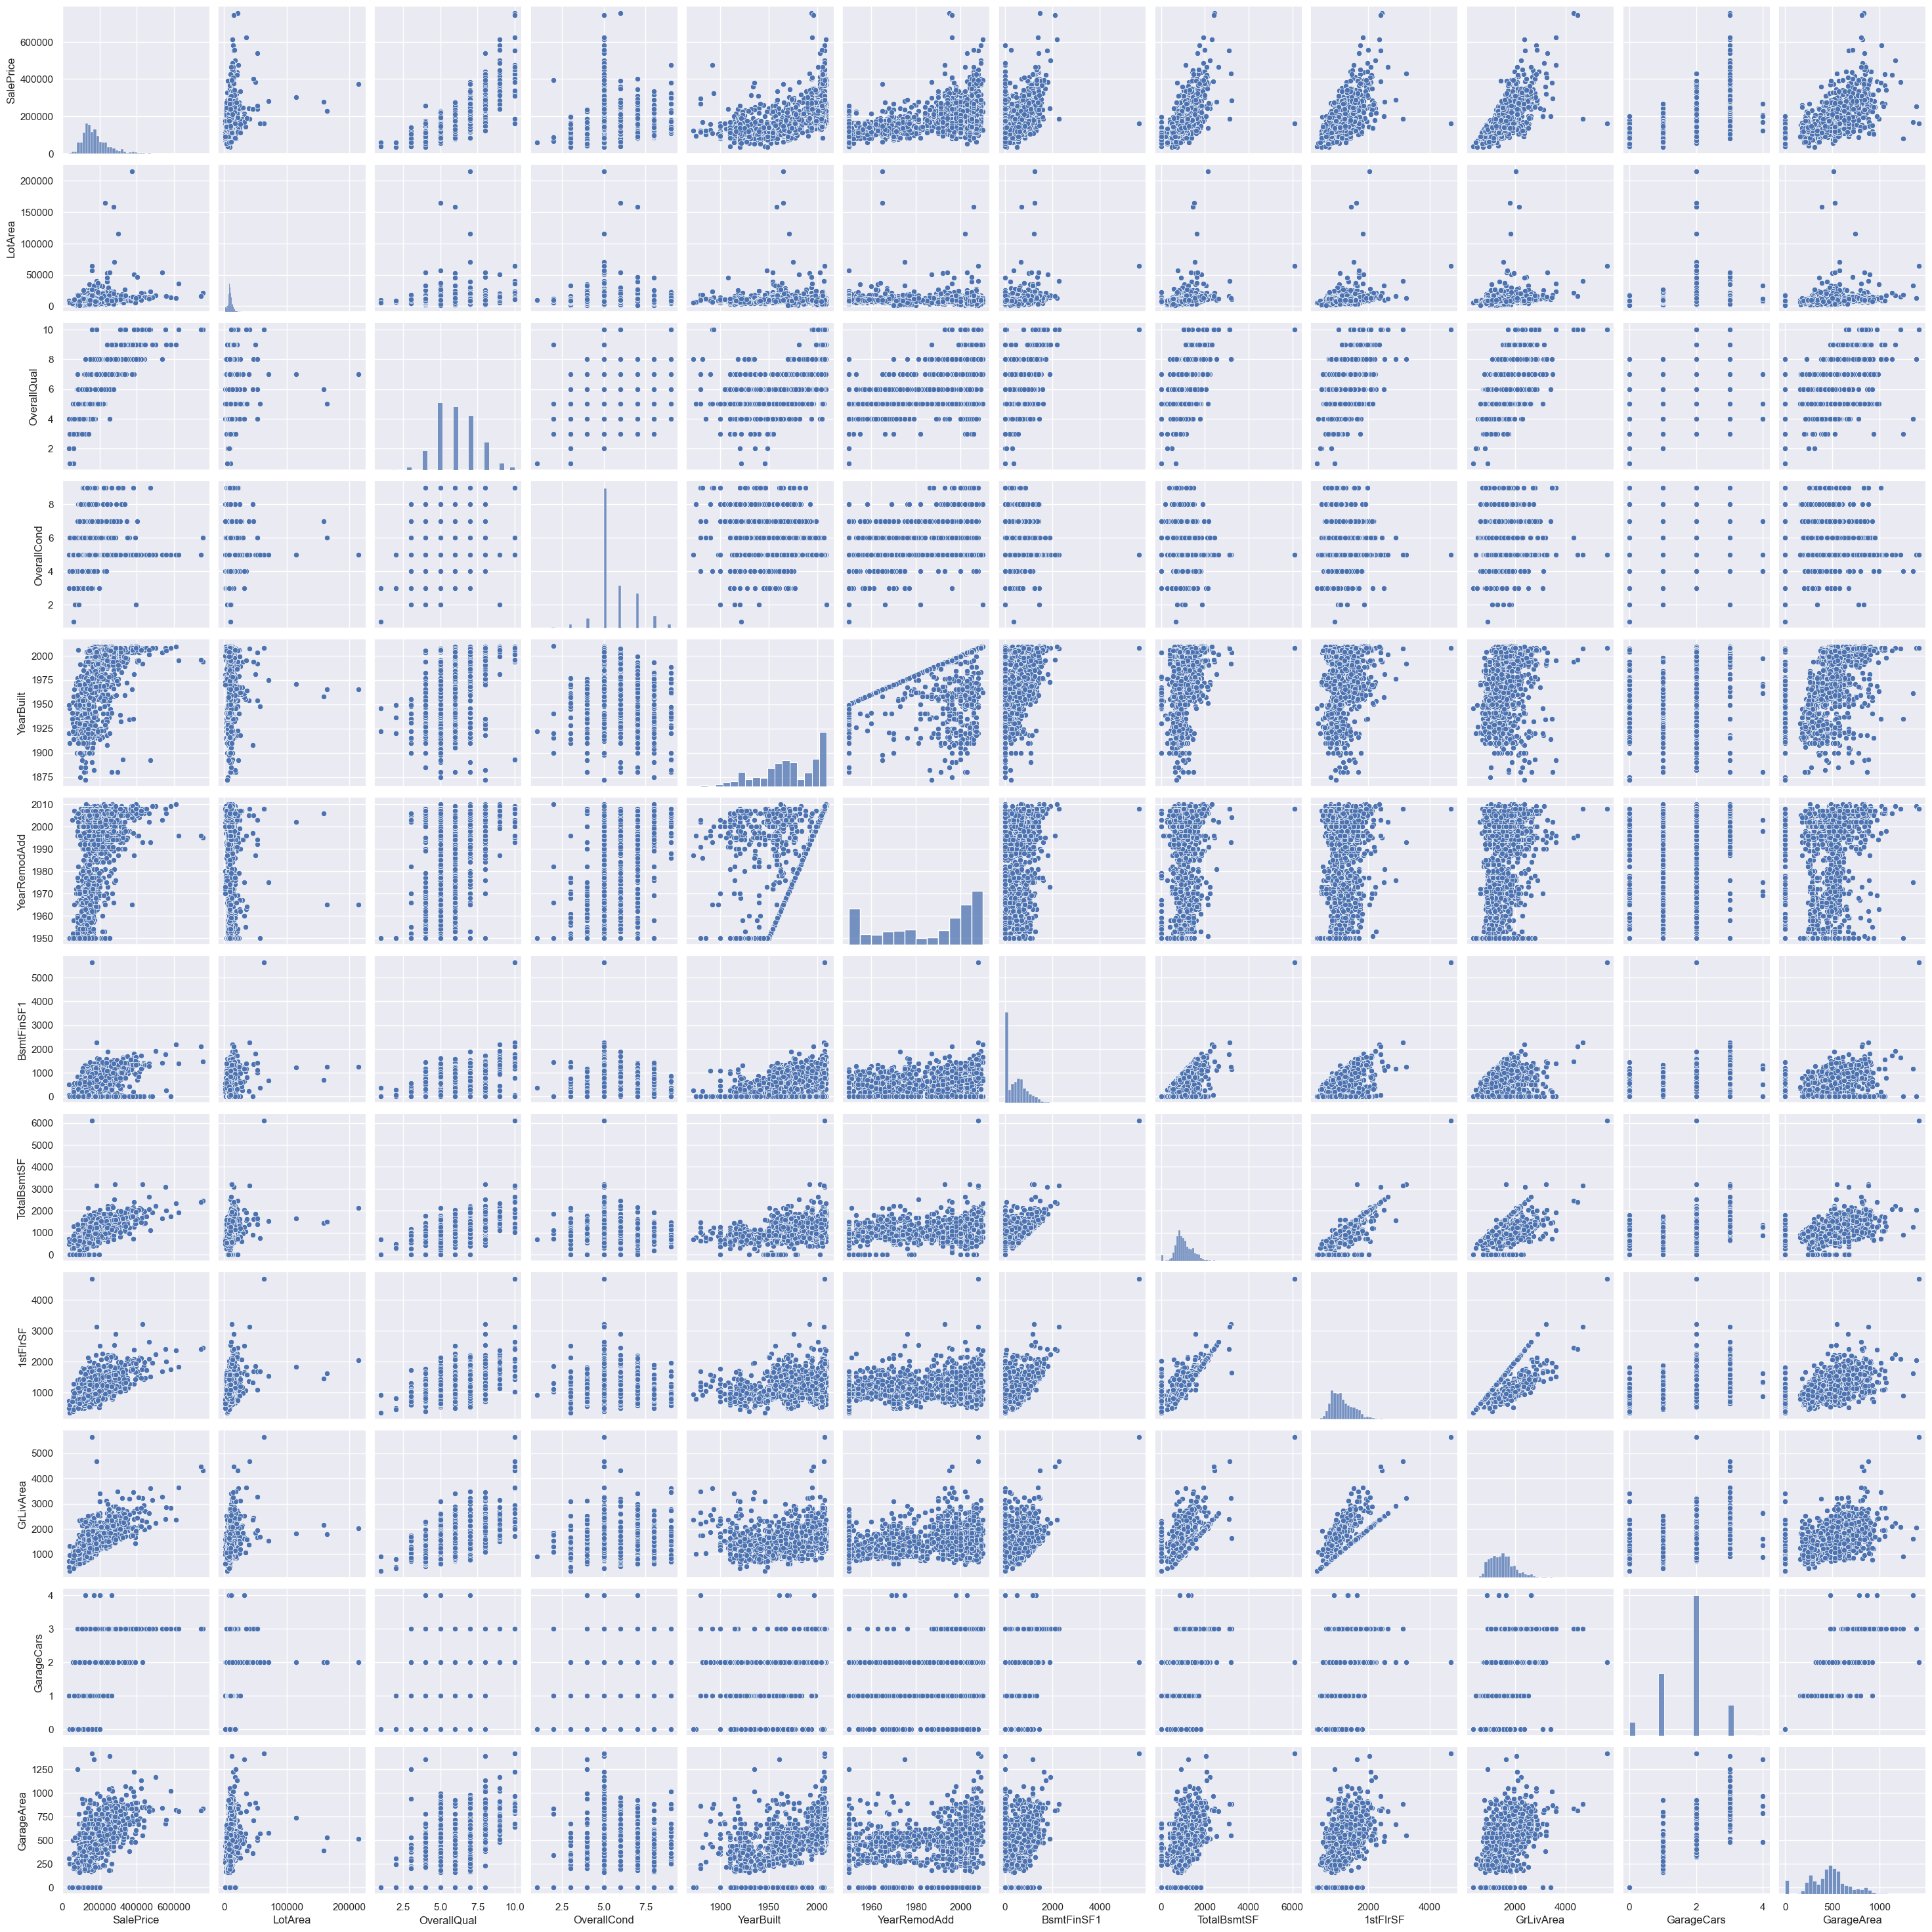

In [78]:
#scatterplot
sns.set()
cols =  ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF','GrLivArea','GarageCars','GarageArea']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

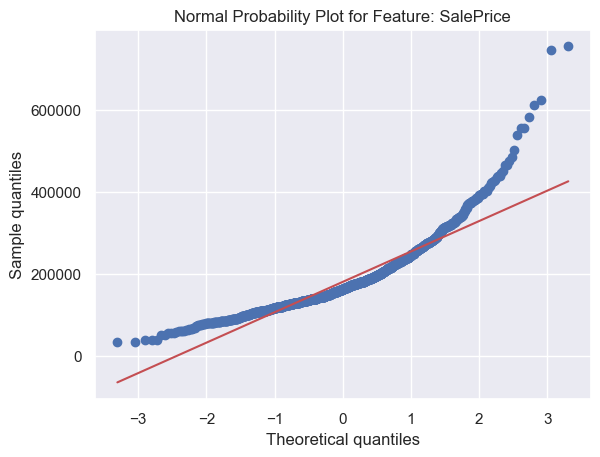

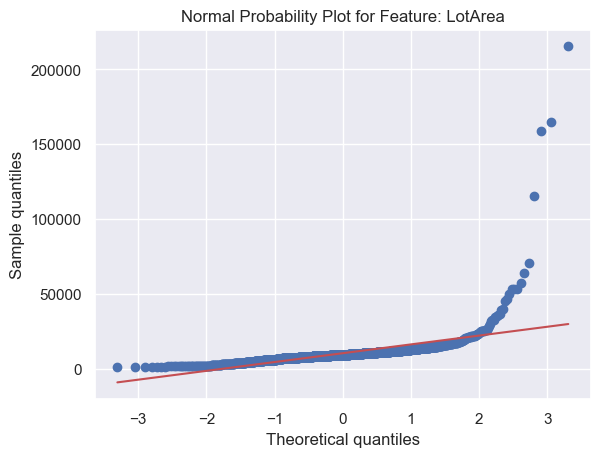

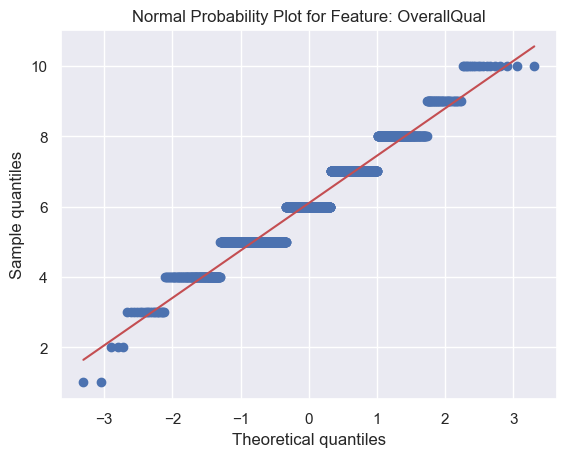

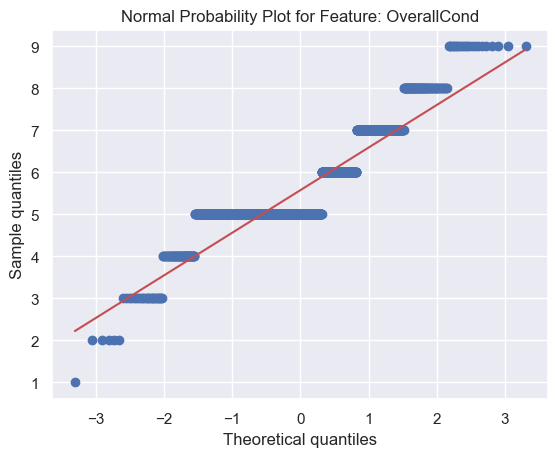

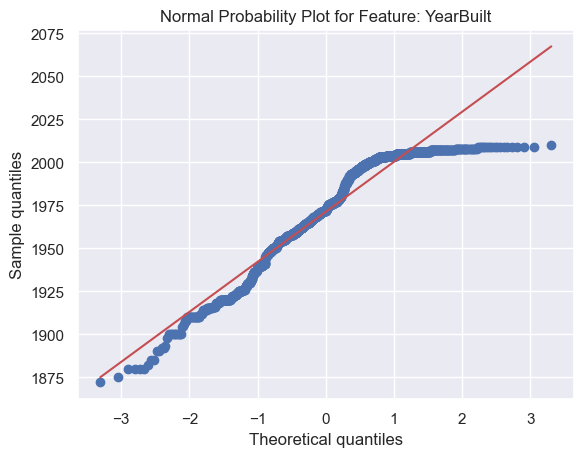

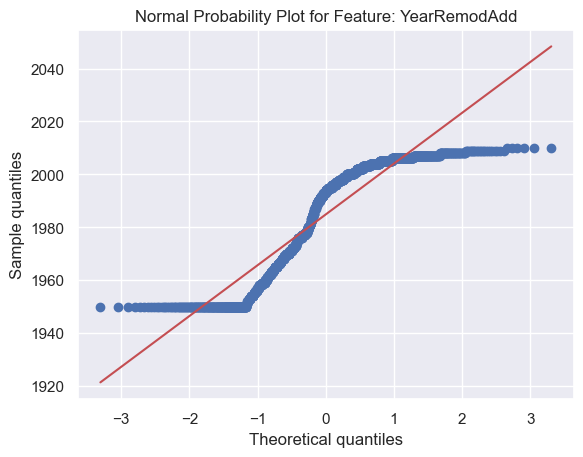

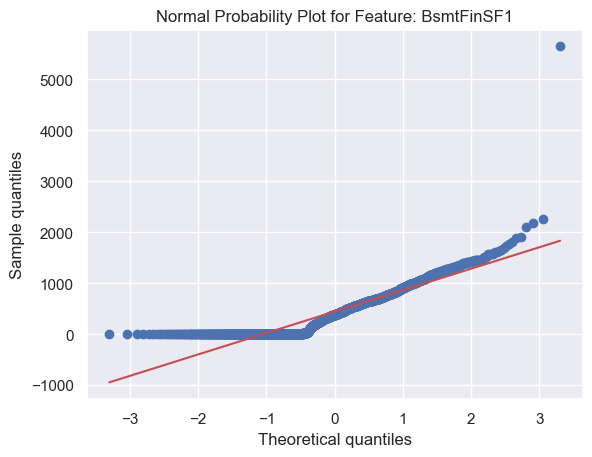

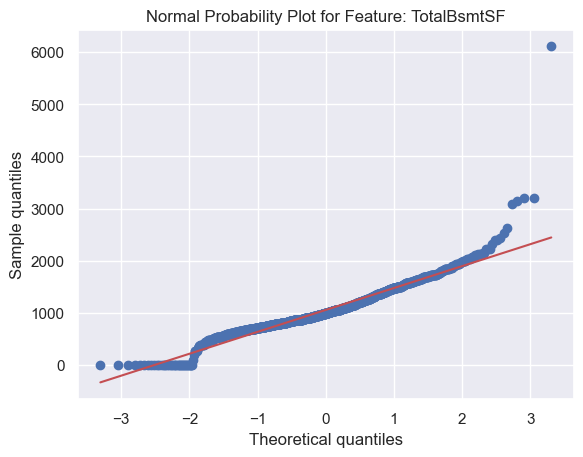

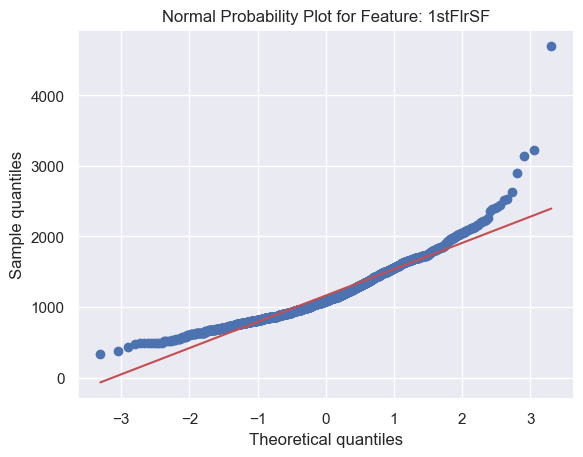

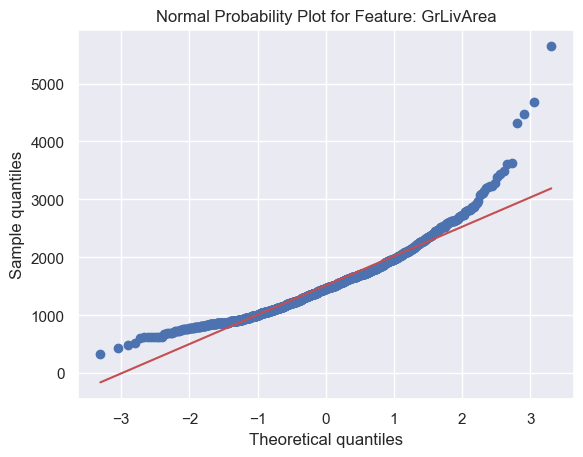

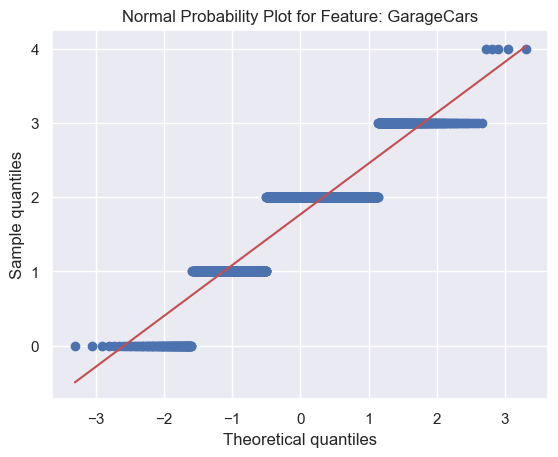

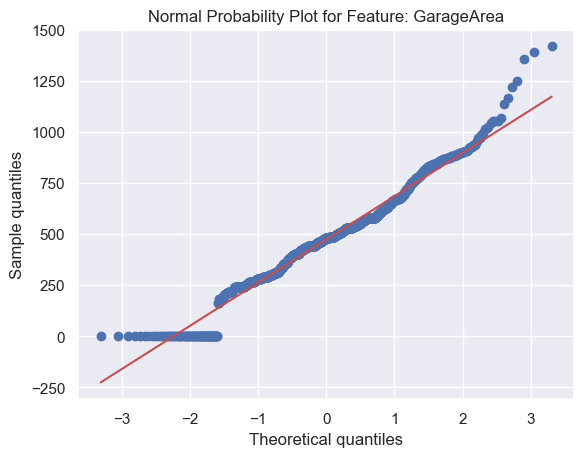

In [79]:
# Create the normal probability plots
for col in cols:
    stats.probplot(df_train[col], plot=plt)
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Sample quantiles')
    plt.title('Normal Probability Plot for Feature: {}'.format(col))
    plt.show()

Ok, thier is some feature is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

# 1stFlrSF

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_6164\359273509.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['1stFlrSF'], fit=norm);


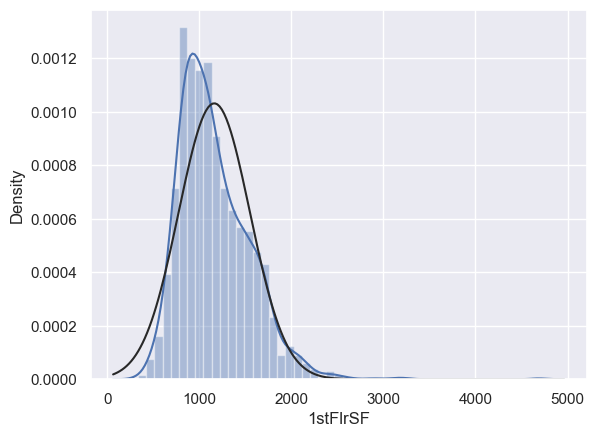

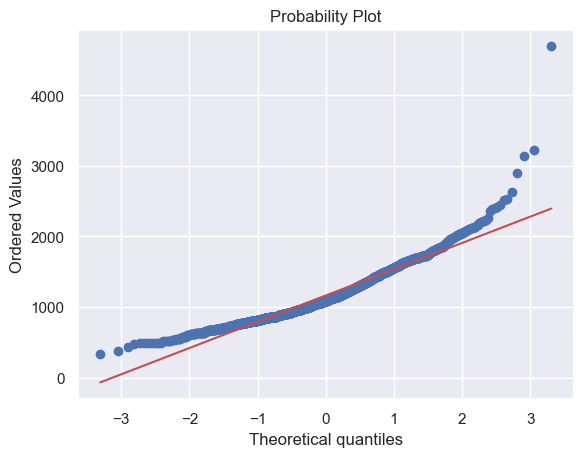

In [80]:
#histogram and normal probability plot
sns.distplot(df_train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['1stFlrSF'], plot=plt)


In [81]:
#applying log transformation for 1stFlrSF
df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_6164\1580171221.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['1stFlrSF'], fit=norm);


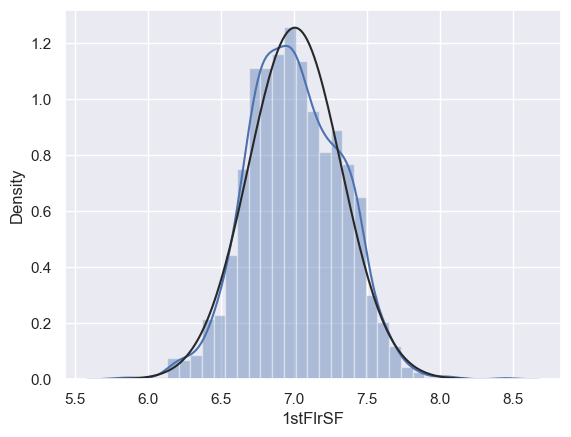

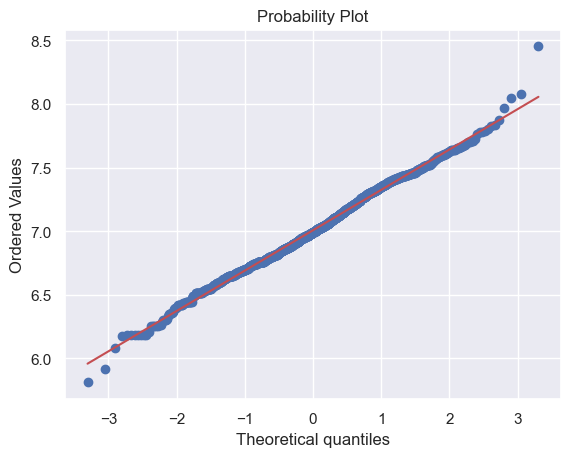

In [82]:
sns.distplot(df_train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['1stFlrSF'], plot=plt)

#### Ok, now we are dealing with the big boss. What do we have here?
Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

# SalePrice

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_6164\3191841523.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=norm);


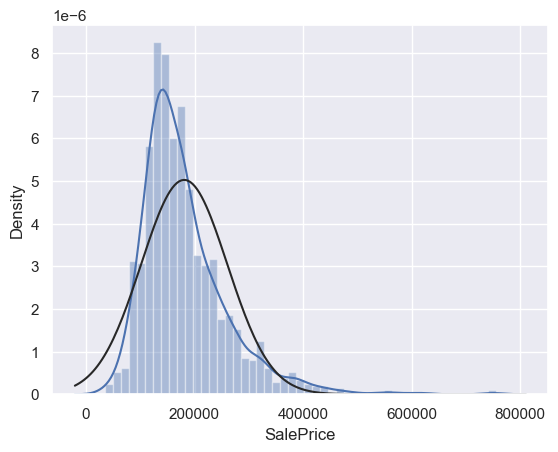

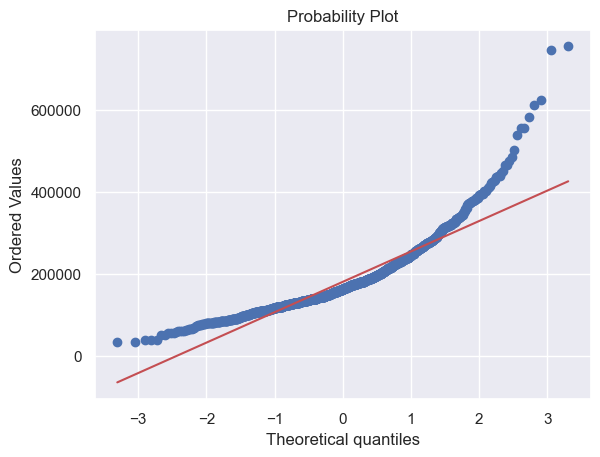

In [83]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)


In [84]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_6164\2829053917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=norm);


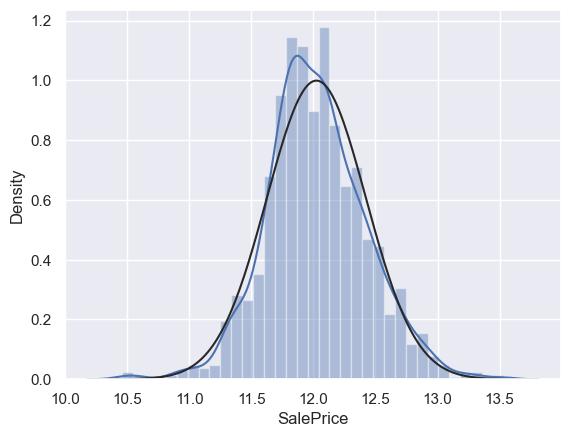

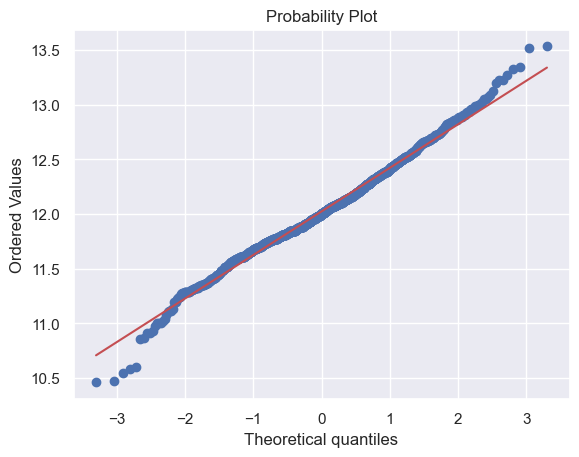

In [85]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# GrLivArea

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_6164\1072101807.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['GrLivArea'], fit=norm);


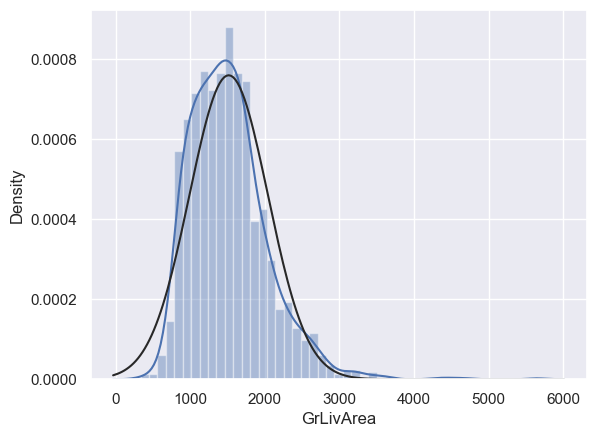

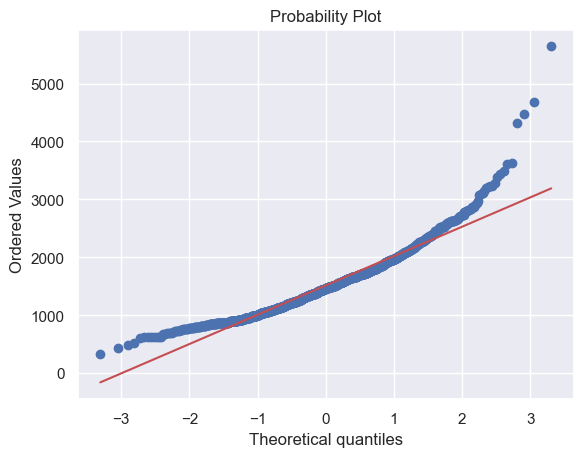

In [86]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [87]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_6164\374798629.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['GrLivArea'], fit=norm);


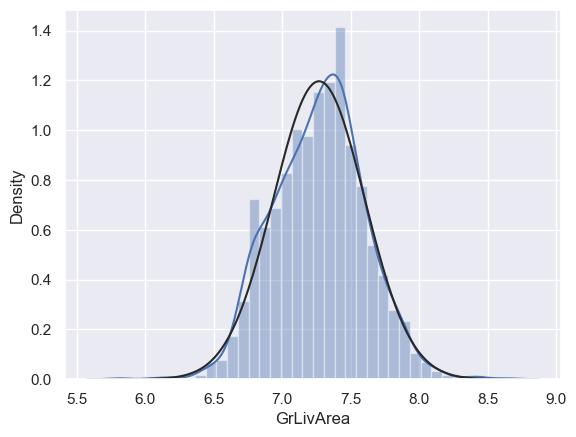

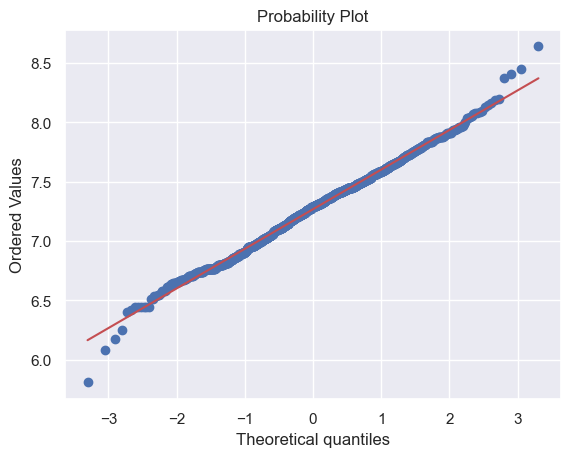

In [88]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

# TotalBsmtSF

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_6164\1011106899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['TotalBsmtSF'], fit=norm);


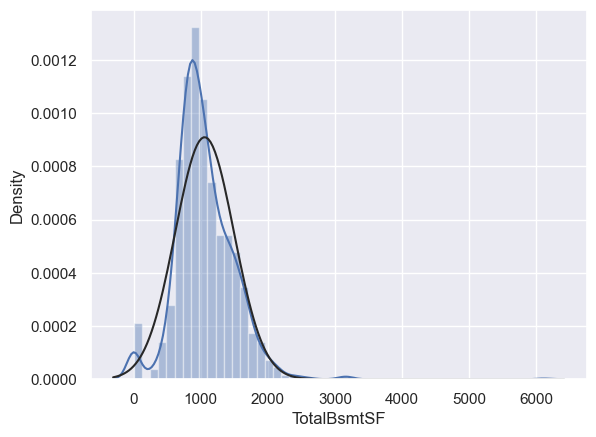

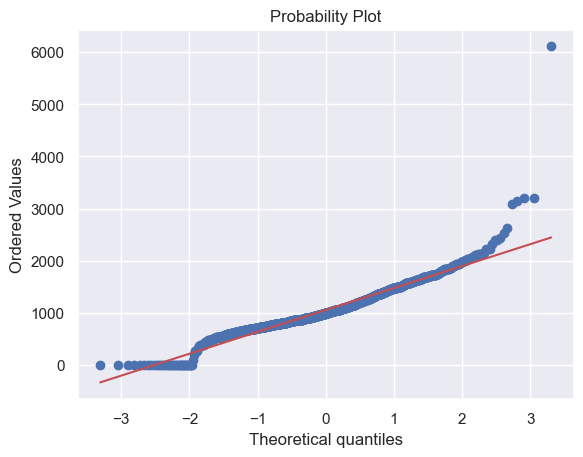

In [89]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

# HasBsmt
##### create column for new variable (one is enough because it's a binary categorical feature)      if area>0 it gets 1, for area==0 it gets 0

In [90]:

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [91]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

C:\Users\Abdelrahman\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_6164\2823553448.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);


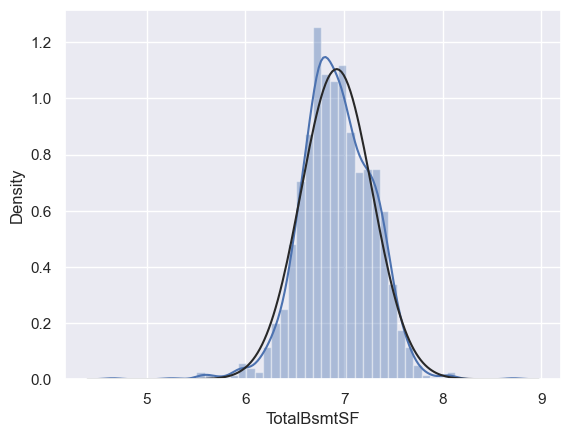

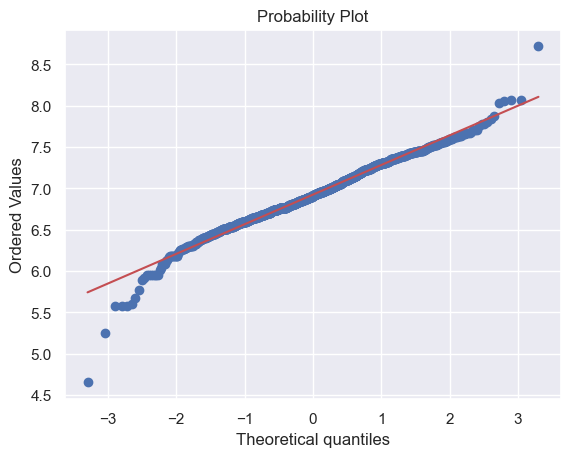

In [92]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [93]:
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,3,8450,1,2,3,3,0,4,...,3,4,4,0,2,2008,8,4,12.247694,1
1,2,20,3,9600,1,2,3,3,0,2,...,3,4,4,0,5,2007,8,4,12.109011,1
2,3,60,3,11250,1,2,0,3,0,4,...,3,4,4,0,9,2008,8,4,12.317167,1
3,4,70,3,9550,1,2,0,3,0,0,...,3,4,4,0,2,2006,8,0,11.849398,1
4,5,60,3,14260,1,2,0,3,0,2,...,3,4,4,0,12,2008,8,4,12.429216,1


In [94]:
X = df_train.drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']
X.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasBsmt
0,1,60,3,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,1
1,2,20,3,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,1
2,3,60,3,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,1
3,4,70,3,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,1
4,5,60,3,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,1


## Do the same (log) to Test Data 

In [95]:
#applying log transformation for 1stFlrSF
df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])

# transform GrLivArea
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

#-----------------------------------------

#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
df_test['HasBsmt'] = 0 
df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform HasBsmt
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

C:\Users\Abdelrahman\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<a id="t3."></a>
# HistGradientBoostingRegressor

In [96]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

# Create the estimator
estimator = HistGradientBoostingRegressor()

# Fit the estimator
estimator.fit(X, y)

# Define a custom importance_getter function
def my_importance_getter(estimator):
    # Compute feature importances using permutation importance
    importances = permutation_importance(estimator, X, y, n_repeats=10, random_state=0)

    # Extract permutation importance scores
    scores = importances['importances_mean']

    # Convert scores to a numerical array
    scores = np.asarray(scores)

    # Apply absolute value function
    scores = np.abs(scores)

    
    return scores

# Create the feature selector
selector = SelectFromModel(estimator=estimator, importance_getter=my_importance_getter, max_features=None)

# Transform the data
#X = selector.fit_transform(X, y)

# Show the X dimension and selected features
print('X Shape is:', X.shape)
print('Selected Features are:', selector.get_support())

X.columns

X Shape is: (1460, 78)
Selected Features are: [False False False  True False False False False False False False False
 False False False False  True  True  True  True False False False False
 False False False False False False False False  True False False False
  True False False False False  True False False  True False False False
 False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False]


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [97]:
# Get the selected features
selected_features = selector.get_support()

# Print the selected feature names
selected_feature_names = X.columns[selected_features]
print("Selected Feature Names:")
for name in selected_feature_names:

    print(name)

Selected Feature Names:
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
TotalBsmtSF
1stFlrSF
GrLivArea
GarageCars
GarageArea


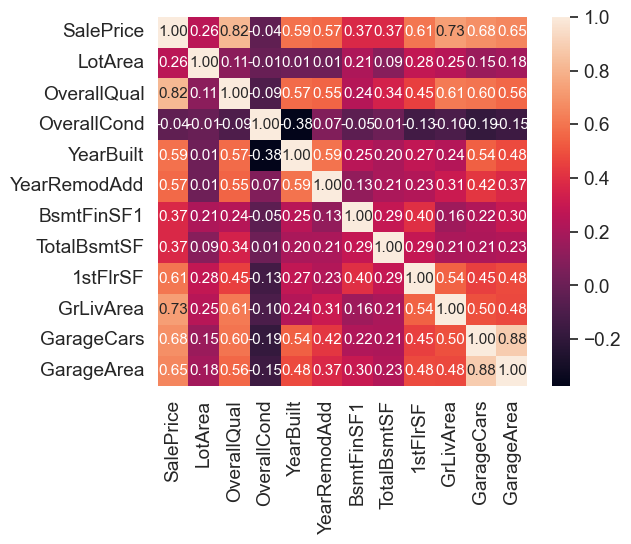

In [98]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Select the variables you want to include in the correlation matrix
cols = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF','GrLivArea','GarageCars','GarageArea']

# Calculate the correlation matrix
cm = np.corrcoef(df_train[cols].values.T)

# Create a heatmap of the correlation matrix
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols, xticklabels=cols)
plt.show()


In [99]:
Hist_X_train = df_train[ ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                        'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF','GrLivArea',
                          'GarageCars','GarageArea']]


y_df_train = df_train['SalePrice']

Hist_X_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,8450,7,5,2003,2003,706,6.752270,1.909879,7.444249,2,548
1,9600,6,8,1976,1976,978,7.140453,1.965776,7.140453,2,460
2,11250,7,5,2001,2002,486,6.824374,1.920501,7.487734,2,608
3,9550,7,5,1915,1970,216,6.628041,1.926869,7.448334,3,642
4,14260,8,5,2000,2000,655,7.043160,1.952057,7.695303,3,836


In [100]:
y_df_train.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Split Test Data besd on selected features

In [101]:
Hist_test=df_test[ ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                   'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF','GrLivArea',
                    'GarageCars','GarageArea']]


Hist_test.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,11622,5,6,1961,1961,468.0,6.782192,896,6.797940,1.0,730.0
1,14267,6,6,1958,1958,923.0,7.192182,1329,7.192182,1.0,312.0
2,13830,5,5,1997,1998,791.0,6.833032,928,7.395722,2.0,482.0
3,9978,6,6,1998,1998,602.0,6.830874,926,7.380256,2.0,470.0
4,5005,8,5,1992,1992,263.0,7.154615,1280,7.154615,2.0,506.0


Training score: 0.9979881959331461
Test score: 0.8653826758276172
Pipeline Model Train Score is :  0.9979881959331461
Pipeline Model Test Score is :  0.8653826758276172
----------------------------------------------------
Predicted Value for Pipeline Model is :  [12.17894152 11.90655948 11.54836149 12.23721072 11.34072098]
---------------------------------------------------
Mean Absolute Error Value is :  0.09915376466341849
Mean Squared Error Value is :  0.02038104159479747
Median Squared Error Value is :  0.07180563885295221
----------------------------------------------------------------------------------
Predicted Value fpr Test data :  [11.80800378 11.9735958  12.076852   12.11494987 12.17712849 12.04885276
 11.98735281 11.99757307 12.10040812 11.75113324]


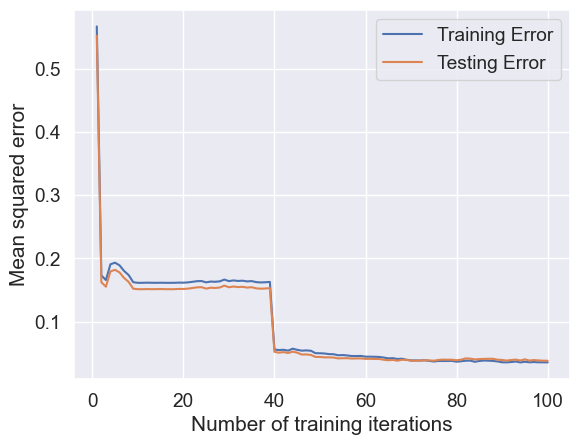

In [102]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error 
#----------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(Hist_X_train , y_df_train , test_size=0.2, random_state=0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [
    ('scalar', StandardScaler()),
    ('model', HistGradientBoostingRegressor(max_iter=500))
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))


#Calculating Details
print('Pipeline Model Train Score is : ' , pipeline.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , pipeline.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = pipeline.predict(X_test)
print('Predicted Value for Pipeline Model is : ' , y_pred[:5])

print("---------------------------------------------------")

#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

 
print('----------------------------------------------------------------------------------')
Hist_pred_data = pipeline.predict(Hist_test)
print('Predicted Value fpr Test data : ' , Hist_pred_data[:10])


model = HistGradientBoostingRegressor(max_iter=100)
# Train the model with different numbers of training iterations
training_errors = []
testing_errors = []
for num_iterations in range(1, 101):
    model.fit(X_train[:num_iterations], y_train[:num_iterations])
    training_errors.append(mean_squared_error(model.predict(X_train), y_train))
    testing_errors.append(mean_squared_error(model.predict(X_test), y_test))

# Plot the learning curves
plt.plot(range(1, 101), training_errors, label='Training Error')
plt.plot(range(1, 101), testing_errors, label='Testing Error')
plt.xlabel('Number of training iterations')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()


### Training and testing error: Compare the error on the training data to the error on the testing data.  if the error on the training data is much lower than the error on the testing data, this is a sign that the model is overfitting.

In [103]:
#get exp to predicted SalePrice to invers the (log)
pred_prise= np.exp(Hist_pred_data)

print(pred_prise[:10])


[134323.15444905 158513.61993078 175756.00896667 182581.12379793
 194294.14204843 170903.22847328 160709.36309007 162360.27521748
 179945.28699275 126897.28262484]



<a id="t4."></a>
# BaggingRegressor

In [104]:
from sklearn.ensemble import BaggingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

# Create the estimator
estimator = BaggingRegressor()

# Fit the estimator
estimator.fit(X, y)

# Define a custom importance_getter function
def my_importance_getter(estimator):
    # Compute feature importances using permutation importance
    importances = permutation_importance(estimator, X, y, n_repeats=10, random_state=0)

    # Extract permutation importance scores
    scores = importances['importances_mean']

    # Convert scores to a numerical array
    scores = np.asarray(scores)

    # Apply absolute value function
    scores = np.abs(scores)

    return scores

# Create the feature selector
selector = SelectFromModel(estimator=estimator, importance_getter=my_importance_getter, max_features=None)

# Transform the data
#X = selector.fit_transform(X, y)

# Show the X dimension and selected features
print('X Shape is:', X.shape)

# Get the selected features
selected_features = selector.get_support()

# Print the selected feature names
selected_feature_names = X.columns[selected_features]
print("Selected Feature Names:")
for name in selected_feature_names:

    print(name)


X Shape is: (1460, 78)
Selected Feature Names:
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
TotalBsmtSF
1stFlrSF
GrLivArea
GarageCars
GarageArea


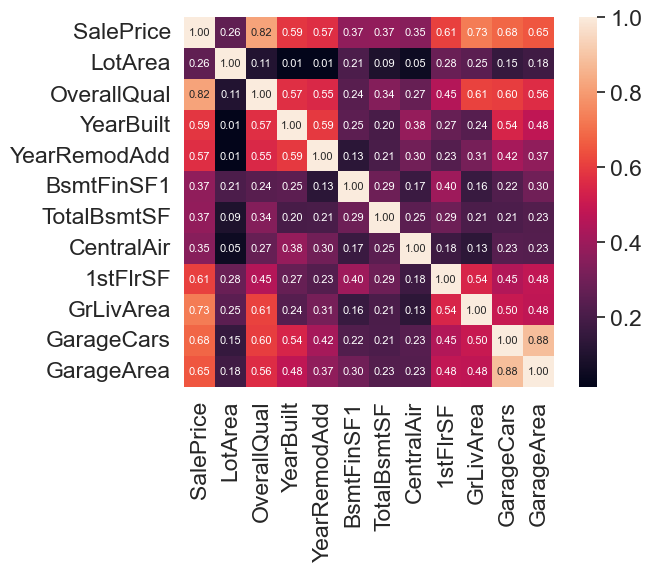

In [105]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Select the variables you want to include in the correlation matrix
cols = ['SalePrice','LotArea', 'OverallQual', 'YearBuilt',
        'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF','CentralAir','1stFlrSF','GrLivArea','GarageCars','GarageArea']

# Calculate the correlation matrix
cm = np.corrcoef(df_train[cols].values.T)

# Create a heatmap of the correlation matrix
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols, xticklabels=cols)
plt.show()


In [106]:
# selct cols in train data

Bag_X = df_train[[ 'LotArea', 'OverallQual', 'YearBuilt',
                  'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF','CentralAir',
                  '1stFlrSF','GrLivArea','GarageCars','GarageArea']]



Bag_X.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,8450,7,2003,2003,706,6.752270,1,1.909879,7.444249,2,548
1,9600,6,1976,1976,978,7.140453,1,1.965776,7.140453,2,460
2,11250,7,2001,2002,486,6.824374,1,1.920501,7.487734,2,608
3,9550,7,1915,1970,216,6.628041,1,1.926869,7.448334,3,642
4,14260,8,2000,2000,655,7.043160,1,1.952057,7.695303,3,836


In [107]:
# selct cols in test data

Bag_test=df_test[[ 'LotArea', 'OverallQual', 'YearBuilt',
                'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF','CentralAir','1stFlrSF',
                  'GrLivArea','GarageCars','GarageArea']]


Bag_test.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,11622,5,1961,1961,468.0,6.782192,1,896,6.797940,1.0,730.0
1,14267,6,1958,1958,923.0,7.192182,1,1329,7.192182,1.0,312.0
2,13830,5,1997,1998,791.0,6.833032,1,928,7.395722,2.0,482.0
3,9978,6,1998,1998,602.0,6.830874,1,926,7.380256,2.0,470.0
4,5005,8,1992,1992,263.0,7.154615,1,1280,7.154615,2.0,506.0


Training score: 0.9791959892163908
Test score: 0.8656961704898828
Pipeline Model Train Score is :  0.9791959892163908
Pipeline Model Test Score is :  0.8656961704898828
----------------------------------------------------
Predicted Value for Pipeline Model is :  [12.38173545 11.83521093 11.67835834 12.30890084 11.39380963 11.66653593
 12.48356879 11.70192919 13.24315198 11.94594544]
Mean Absolute Error Value is :  0.10092487441208947
Mean Squared Error Value is :  0.020333578552498396
Median Squared Error Value is :  0.0744352338879608
----------------------------------------------------------------------------------
Predicted Value fpr Test data :  [11.78554109 11.95798776 12.12918779 12.13816096 12.32614237 12.08635558
 12.01227528 12.07963633 12.15025831 11.73747831]


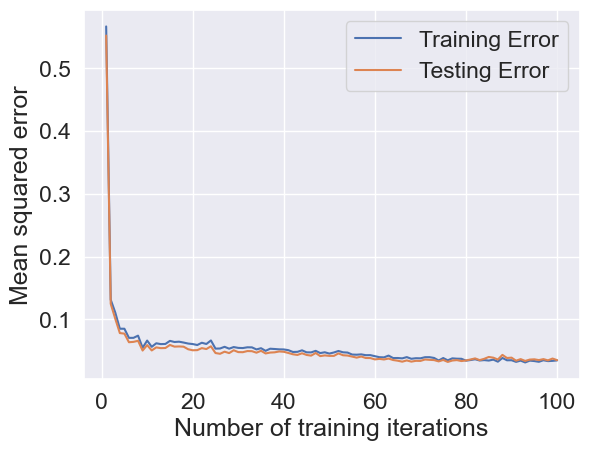

In [108]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error 
#----------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(Bag_X, y_df_train, test_size=0.2, random_state=0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [
    ('scalar', StandardScaler()),
    ('model', BaggingRegressor(n_estimators=50))
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))


#Calculating Details
print('Pipeline Model Train Score is : ' , pipeline.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , pipeline.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = pipeline.predict(X_test)
print('Predicted Value for Pipeline Model is : ' , y_pred[:10])


#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

 
print('----------------------------------------------------------------------------------')
Bag_pred_data = pipeline.predict(Bag_test)
print('Predicted Value fpr Test data : ' , Bag_pred_data[:10])


model = BaggingRegressor(n_estimators=50)
# Train the model with different numbers of training iterations
training_errors = []
testing_errors = []
for num_iterations in range(1, 101):
    model.fit(X_train[:num_iterations], y_train[:num_iterations])
    training_errors.append(mean_squared_error(model.predict(X_train), y_train))
    testing_errors.append(mean_squared_error(model.predict(X_test), y_test))

# Plot the learning curves
plt.plot(range(1, 101), training_errors, label='Training Error')
plt.plot(range(1, 101), testing_errors, label='Testing Error')
plt.xlabel('Number of training iterations')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()


In [109]:
#get exp to predicted SalePrice to invers the (log)
pred_prise= np.exp(Bag_pred_data)


print(pred_prise[:10])


[131339.5314923  156058.74170904 185199.29341222 186868.59699242
 225515.09338995 177434.28232082 164764.96464457 176246.05436562
 189142.94019754 125176.28543163]


<a id="t5."></a>
# DecisionTreeRegressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

# Create the estimator
estimator = DecisionTreeRegressor()

# Fit the estimator
estimator.fit(X, y)

# Define a custom importance_getter function
def my_importance_getter(estimator):
    # Compute feature importances using permutation importance
    importances = permutation_importance(estimator, X, y, n_repeats=10, random_state=0)

    # Extract permutation importance scores
    scores = importances['importances_mean']

    # Convert scores to a numerical array
    scores = np.asarray(scores)

    # Apply absolute value function
    scores = np.abs(scores)

    return scores

# Create the feature selector
selector_tree = SelectFromModel(estimator=estimator, importance_getter=my_importance_getter, max_features=None)

# Transform the data
#X = selector.fit_transform(X, y)

# Show the X dimension and selected features
print('X Shape is:', X.shape)

# Get the selected features
selected_features = selector_tree.get_support()

# Print the selected feature names
selected_feature_names = X.columns[selected_features]
print("Selected Feature Names:")
for name in selected_feature_names:

    print(name)

X Shape is: (1460, 78)
Selected Feature Names:
LotArea
Neighborhood
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
CentralAir
1stFlrSF
GrLivArea
GarageType
GarageFinish
GarageArea


In [111]:
# selct cols in train data

tree_X = df_train[ ['Neighborhood','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                  'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF', 'CentralAir','1stFlrSF','GrLivArea'
                   ,'GarageFinish','GarageArea']]



tree_X.head()

,Neighborhood,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,GrLivArea,GarageFinish,GarageArea
0,5,8450,7,5,2003,2003,706,6.752270,1,1.909879,7.444249,1,548
1,24,9600,6,8,1976,1976,978,7.140453,1,1.965776,7.140453,1,460
2,5,11250,7,5,2001,2002,486,6.824374,1,1.920501,7.487734,1,608
3,6,9550,7,5,1915,1970,216,6.628041,1,1.926869,7.448334,2,642
4,15,14260,8,5,2000,2000,655,7.043160,1,1.952057,7.695303,1,836


In [112]:
# selct cols in test data

tree_test=df_test[ ['Neighborhood','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                  'YearRemodAdd','BsmtFinSF1', 'TotalBsmtSF', 'CentralAir','1stFlrSF','GrLivArea'
                   ,'GarageFinish','GarageArea']]


tree_test.head()

,Neighborhood,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,GrLivArea,GarageFinish,GarageArea
0,12,11622,5,6,1961,1961,468.0,6.782192,1,896,6.797940,2,730.0
1,12,14267,6,6,1958,1958,923.0,7.192182,1,1329,7.192182,2,312.0
2,8,13830,5,5,1997,1998,791.0,6.833032,1,928,7.395722,0,482.0
3,8,9978,6,6,1998,1998,602.0,6.830874,1,926,7.380256,0,470.0
4,22,5005,8,5,1992,1992,263.0,7.154615,1,1280,7.154615,1,506.0


Training score: 0.9999772742695975
Test score: 0.7194682571262458
Pipeline Model Train Score is :  0.9999772742695975
Pipeline Model Test Score is :  0.7194682571262458
----------------------------------------------------
Predicted Value for Pipeline Model is :  [12.53177279 12.07254125 11.75194237 12.24288662 11.4019939  11.5943211
 12.40901349 11.69107165 13.34550693 11.92503512]
Mean Absolute Error Value is :  0.13989825631244396
Mean Squared Error Value is :  0.042472461515053524
Median Squared Error Value is :  0.08897906511347298
----------------------------------------------------------------------------------
Predicted Value fpr Test data :  [11.87234663 11.77528973 12.24961095 12.10015642 12.27139211 12.08953883
 11.94145585 12.08390501 12.10015642 11.6195352 ]


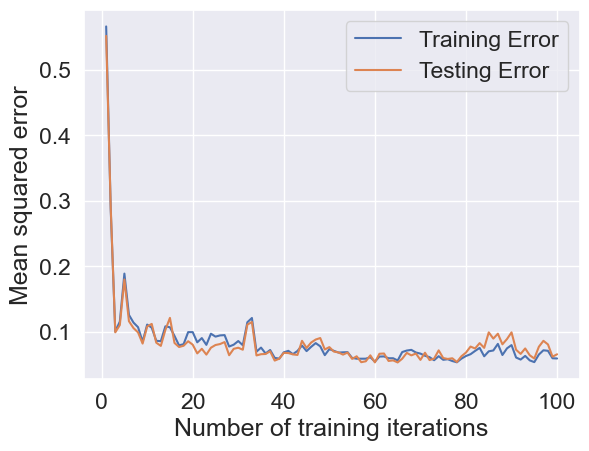

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error 
#----------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(tree_X, y_df_train, test_size=0.2, random_state=0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeRegressor())#=,,
]                    

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))


#Calculating Details
print('Pipeline Model Train Score is : ' , pipeline.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , pipeline.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = pipeline.predict(X_test)
print('Predicted Value for Pipeline Model is : ' , y_pred[:10])


#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

 
print('----------------------------------------------------------------------------------')
tree_pred_data = pipeline.predict(tree_test)
print('Predicted Value fpr Test data : ' , tree_pred_data[:10])


model = DecisionTreeRegressor()
# Train the model with different numbers of training iterations
training_errors = []
testing_errors = []
for num_iterations in range(1, 101):
    model.fit(X_train[:num_iterations], y_train[:num_iterations])
    training_errors.append(mean_squared_error(model.predict(X_train), y_train))
    testing_errors.append(mean_squared_error(model.predict(X_test), y_test))

# Plot the learning curves
plt.plot(range(1, 101), training_errors, label='Training Error')
plt.plot(range(1, 101), testing_errors, label='Testing Error')
plt.xlabel('Number of training iterations')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()

### we see her over fit because the trainig error line under the testing error in many plesces

In [114]:
#get exp to predicted SalePrice 
pred_prise= np.exp(tree_pred_data)


print(pred_prise[:10])

[143250. 130000. 208900. 179900. 213500. 178000. 153500. 177000. 179900.
 111250.]


# --------------------------------------------------------------------------------------------------------------

# <b>References</b>
* [kaggle](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python#Want-to-learn-more?)
* [scikit-learn.org]( https://scikit-learn.org/stable/modules/impute.html)
* [Hair et al., 2013, Multivariate Data Analysis, 7th Edition](https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values)